In [20]:
import torch
import numpy as np
import pandas as pd
import torchvision

from torchvision import models
from torchvision import transforms

resnet=models.resnet101(pretrained=True)

preprocess=transforms.Compose([
                               transforms.Resize(256),
                               transforms.CenterCrop(224),
                               transforms.ToTensor(),
                               transforms.Normalize(
                                   mean=[0.485,0.456,.0406],
                                   std=[0.229,0.224,0.225]
                               )

])


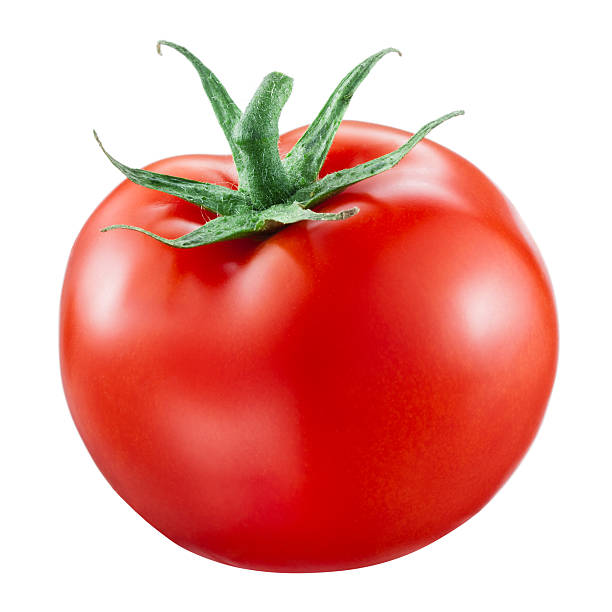

In [21]:
from PIL import Image

img1=Image.open("/Training Images/447px-Gutenberg_Bible,_Lenox_Copy,_New_York_Public_Library,_2009._Pic_01.jpg")
img2=Image.open("/Training Images/_111434467_gettyimages-1143489763.jpg")
img3=Image.open("/Training Images/images.jpg")
img4=Image.open("/Training Images/index.jpg")
img5=Image.open("/Training Images/istockphoto-466175630-612x612.jpg")

img1
img2
img3
img4
img5

In [22]:
train_img1=preprocess(img1)
train_img2=preprocess(img2)
train_img3=preprocess(img3)
train_img4=preprocess(img4)
train_img5=preprocess(img5)

batch_trained1=torch.unsqueeze(train_img1,0)
batch_trained2=torch.unsqueeze(train_img2,0)
batch_trained3=torch.unsqueeze(train_img3,0)
batch_trained4=torch.unsqueeze(train_img4,0)
batch_trained5=torch.unsqueeze(train_img5,0)

In [23]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
out1=resnet(batch_trained1)
out2=resnet(batch_trained2)
out3=resnet(batch_trained3)
out4=resnet(batch_trained4)
out5=resnet(batch_trained5)



with open('/Training Images/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

_, index1=torch.max(out1,1)
_, index2=torch.max(out2,1)
_, index3=torch.max(out3,1)
_, index4=torch.max(out4,1)
_, index5=torch.max(out5,1)

In [25]:
percentage1 = torch.nn.functional.softmax(out1, dim=1)[0] * 100
labels[index1[0]], percentage[index1[0]].item()


('umbrella', 39.99312210083008)

In [26]:
percentage2 = torch.nn.functional.softmax(out2, dim=1)[0] * 100
labels[index2[0]], percentage[index2[0]].item()


('tabby, tabby cat', 0.0011023287661373615)

In [27]:
percentage3 = torch.nn.functional.softmax(out3, dim=1)[0] * 100
labels[index3[0]], percentage[index3[0]].item()


('porcupine, hedgehog', 0.00025331496726721525)

In [28]:
percentage4 = torch.nn.functional.softmax(out4, dim=1)[0] * 100
labels[index4[0]], percentage[index4[0]].item()


('jay', 0.00017021152598317713)

In [29]:
percentage5 = torch.nn.functional.softmax(out5, dim=1)[0] * 100
labels[index5[0]], percentage[index5[0]].item()

('hip, rose hip, rosehip', 0.00016792042879387736)